## Let's train some Neural Networks on this data set using PyTorch

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# metadata 
print(default_of_credit_card_clients.metadata) 
  
# variable information 
print(default_of_credit_card_clients.variables)

{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

In [14]:
#importing the libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# other libraries

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



In [16]:
print(X.shape)

X.head()
y.head()

# Combine features and target into a single DataFrame 
df = pd.concat([X, y], axis=1)


df.head()

# Data preprocessing
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(30000, 23)


In [18]:
# Import PyTorch libraries

import torch

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set the seed for reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).squeeze()
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).squeeze()

Training Simple Neural Network (20 epochs)...
Training Complex Neural Network (50 epochs)...
Model Performance Comparison:
                                Model  Accuracy
0   Simple Neural Network (20 epochs)  0.792333
1  Complex Neural Network (50 epochs)  0.801000


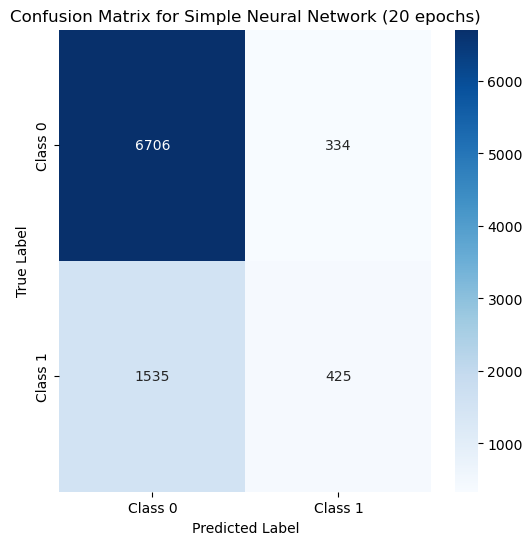

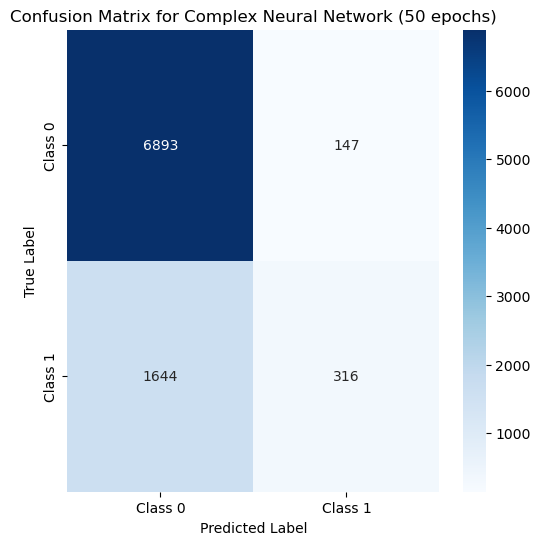

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the seed for reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Define the Simple Neural Network (20 epochs, fewer layers)
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Define the Complex Neural Network (50 epochs, more hidden layers)
class ComplexNN(nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Function to train and evaluate a neural network with specified epochs
def train_and_evaluate_nn(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs):
    criterion = nn.BCELoss()  # Binary Cross Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    
    # Make predictions on the test set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        y_pred_nn = model(X_test_tensor)
        y_pred_nn = (y_pred_nn > 0.5).float()  # Convert to binary predictions
    
    # Convert predictions to numpy for evaluation
    y_pred_nn = y_pred_nn.numpy()
    y_test_np = y_test_tensor.numpy()
    
    # Calculate accuracy
    accuracy_nn = accuracy_score(y_test_np, y_pred_nn)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_np, y_pred_nn)
    
    return accuracy_nn, cm

# Train and evaluate each neural network with the specified number of epochs
models = {
    "Simple Neural Network (20 epochs)": (SimpleNN(), 20),
    "Complex Neural Network (50 epochs)": (ComplexNN(), 50)
}

# Store the results for each model
results = []

for model_name, (model, epochs) in models.items():
    print(f"Training {model_name}...")
    accuracy, cm = train_and_evaluate_nn(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs)
    
    # Append results for each model
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Confusion Matrix": cm
    })

# Convert results to a DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Print the model performance comparison
print("Model Performance Comparison:")
print(results_df[['Model', 'Accuracy']])  # Print only accuracy for each model

# Visualization: Confusion Matrix for each model
for result in results:
    model_name = result['Model']
    cm = result['Confusion Matrix']
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


Training Simple Neural Network (100 epochs)...
Training Complex Neural Network (200 epochs)...
Model Performance Comparison:
                                 Model  Accuracy
0   Simple Neural Network (100 epochs)  0.787667
1  Complex Neural Network (200 epochs)  0.817889


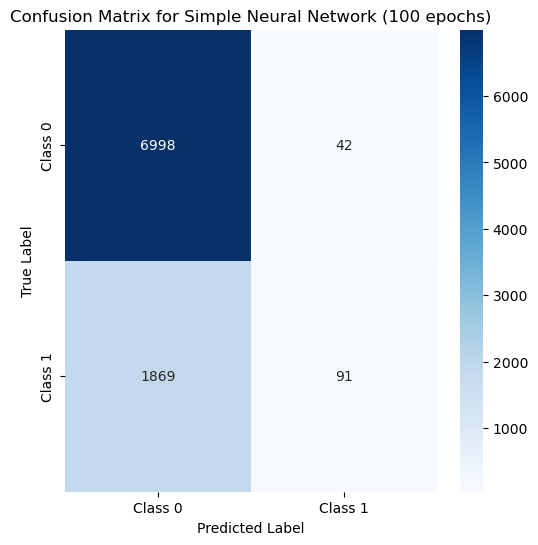

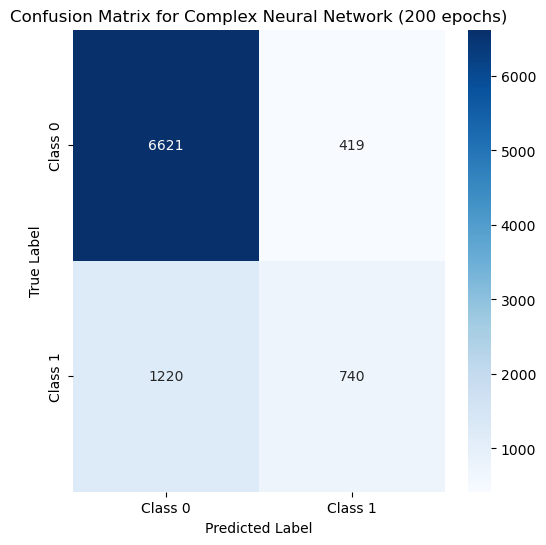

In [38]:
# Define the Simple Neural Network (100 epochs, fewer layers)
class SimpleNN_100epochs(nn.Module):
    def __init__(self):
        super(SimpleNN_100epochs, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Define the Complex Neural Network (200 epochs, more hidden layers)
class ComplexNN_200epochs(nn.Module):
    def __init__(self):
        super(ComplexNN_200epochs, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

# Train and evaluate each neural network with the specified number of epochs
models_2 = {
    "Simple Neural Network (100 epochs)": (SimpleNN_100epochs(), 100),
    "Complex Neural Network (200 epochs)": (ComplexNN_200epochs(), 200)
}

# Store the results for each model
results_2 = []

for model_name, (model, epochs) in models_2.items():
    print(f"Training {model_name}...")
    accuracy, cm = train_and_evaluate_nn(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs)
    
    # Append results for each model
    results_2.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Confusion Matrix": cm
    })

# Convert results to a DataFrame for easy visualization
results_df_2 = pd.DataFrame(results_2)

# Print the model performance comparison
print("Model Performance Comparison:")
print(results_df_2[['Model', 'Accuracy']])  # Print only accuracy for each model

# Visualization: Confusion Matrix for each model
for result in results_2:
    model_name = result['Model']
    cm = result['Confusion Matrix']
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


Accuracy is lower than our tuned random forest model. 
However, the NN were fitted on the 'raw' data set with minimal pre-processing steps. Another step would be to first adopt steps from my main analysis like outlier removal and addressing the imbalancing issue in the data set (e.x. using SMOTE) and furthermore do some hyperparameter tuning to try to improve the performance of the NN. I want to work on this in the future andcreport my improvements to this repository once finalized.